In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 5000      # En sık kullanılan 5000 kelime
maxlen = 200           # Her yorum maksimum 200 kelime uzunluğunda olacak
embedding_dim = 32     # Kelime vektör boyutu
batch_size = 64
epochs = 5

In [3]:
# 3️⃣ IMDb veri setini yükle
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# 4️⃣ Dizileri aynı uzunlukta pad et
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train shape: (25000, 200)
x_test shape: (25000, 200)


In [4]:
# 5️⃣ LSTM modelini oluştur
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=maxlen),
    LSTM(64),            # 64 LSTM hücresi
    Dense(1, activation='sigmoid')  # Çıkış: pozitif/negatif
])

# 6️⃣ Modeli derle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 7️⃣ Modeli eğit
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2
)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 148ms/step - accuracy: 0.5511 - loss: 0.6801 - val_accuracy: 0.6254 - val_loss: 0.6508
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 146ms/step - accuracy: 0.6652 - loss: 0.6176 - val_accuracy: 0.7394 - val_loss: 0.5690
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 149ms/step - accuracy: 0.7512 - loss: 0.5416 - val_accuracy: 0.6076 - val_loss: 0.6648
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 146ms/step - accuracy: 0.6397 - loss: 0.6111 - val_accuracy: 0.5372 - val_loss: 0.7762
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 143ms/step - accuracy: 0.5990 - loss: 0.6526 - val_accuracy: 0.6490 - val_loss: 0.6032


In [6]:
# 8️⃣ Test verisi ile değerlendir
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6493 - loss: 0.6042
Test Loss: 0.6040, Test Accuracy: 0.6476


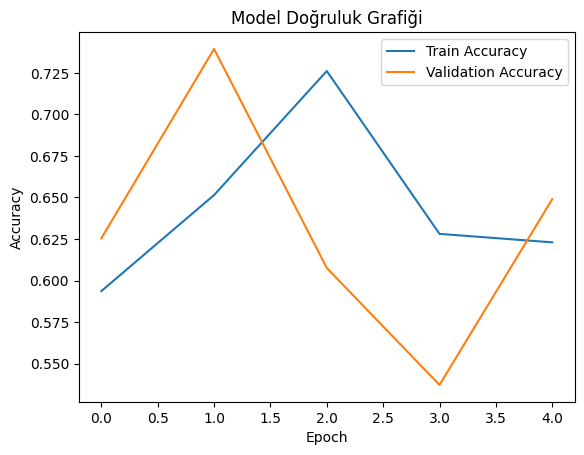

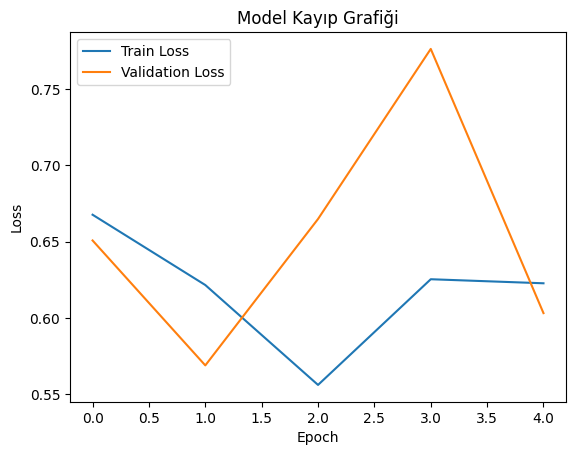

In [7]:
# 9️⃣ Eğitim geçmişini görselleştirelim
import matplotlib.pyplot as plt

# Doğruluk grafiği
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Doğruluk Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Kayıp grafiği
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Kayıp Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
# 10️⃣ Tek bir yorum tahmini yapalım
# Örnek bir yorum
sample_review = "This movie was amazing! The story and acting were fantastic."

# IMDb veri seti için kelime-index sözlüğünü al
word_index = imdb.get_word_index()

# Yorumu sayılara çevir
def review_to_sequence(review):
    tokens = review.lower().split()
    sequence = []
    for word in tokens:
        index = word_index.get(word, 2)  # bilinmeyen kelime = 2
        if index < vocab_size:
            sequence.append(index+3)      # IMDb dataset indeksi ofsetli
    return pad_sequences([sequence], maxlen=maxlen, padding='post')

sample_seq = review_to_sequence(sample_review)

# Tahmin yap
prediction = model.predict(sample_seq)[0][0]
sentiment = "Pozitif" if prediction > 0.5 else "Negatif"

print(f"Yorum: {sample_review}")
print(f"Tahmin: {sentiment} (olasılık: {prediction:.4f})")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Yorum: This movie was amazing! The story and acting were fantastic.
Tahmin: Negatif (olasılık: 0.4658)
